In [1]:
import os
os.environ['PYSPARK_PYTHON'] = r'C:\ProgramData\anaconda3\envs\env_DE\python.exe'
os.environ['PYSPARK_DRIVER_PYTHON'] = r'C:\ProgramData\anaconda3\envs\env_DE\python.exe'

In [ ]:
from pyspark.sql import SparkSession

# Створюємо сесію Spark
spark = SparkSession.builder \
    .master("local[*]") \
    .config("spark.sql.shuffle.partitions", "2") \
    .appName("MyGoitSparkSandbox") \
    .getOrCreate()

# Завантажуємо датасет
nuek_df = spark.read \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .csv('./nuek-vuh3.csv')

nuek_repart = nuek_df.repartition(2)

nuek_processed = nuek_repart \
    .where("final_priority < 3") \
    .select("unit_id", "final_priority") \
    .groupBy("unit_id") \
    .count()

# Ось ТУТ додано рядок
nuek_processed = nuek_processed.where("count>2")

nuek_processed.collect()

input("Press Enter to continue...5")

# Закриваємо сесію Spark
spark.stop()


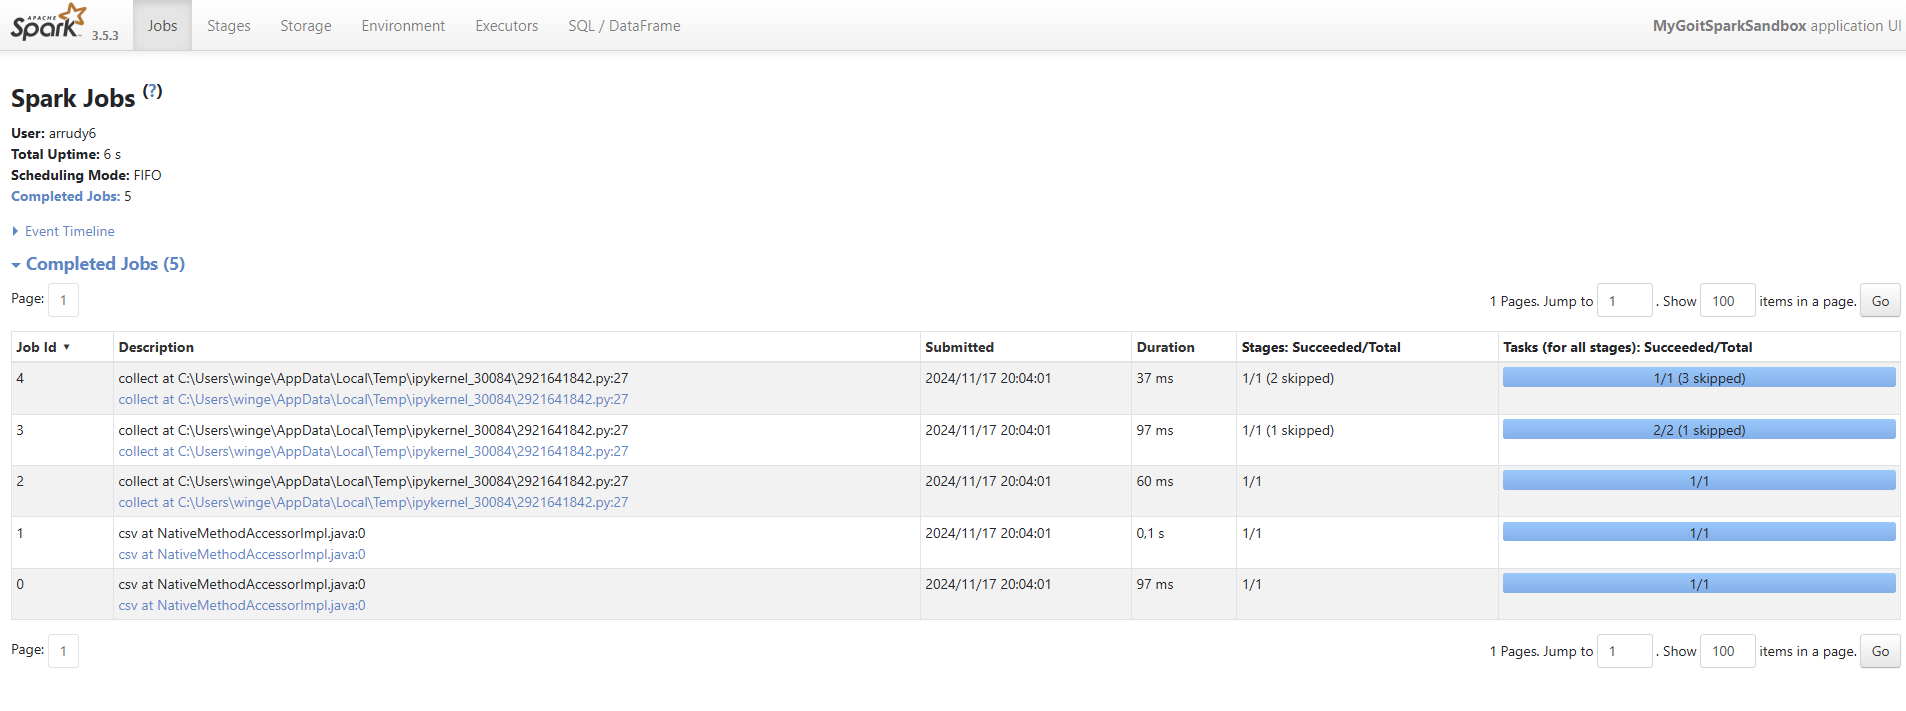

In [ ]:
from pyspark.sql import SparkSession

# Створюємо сесію Spark
spark = SparkSession.builder \
    .master("local[*]") \
    .config("spark.sql.shuffle.partitions", "2") \
    .appName("MyGoitSparkSandbox") \
    .getOrCreate()

# Завантажуємо датасет
nuek_df = spark.read \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .csv('./nuek-vuh3.csv')

nuek_repart = nuek_df.repartition(2)

nuek_processed = nuek_repart \
    .where("final_priority < 3") \
    .select("unit_id", "final_priority") \
    .groupBy("unit_id") \
    .count()
    
# Проміжний action: collect
nuek_processed.collect()

# Ось ТУТ додано рядок
nuek_processed = nuek_processed.where("count>2")

nuek_processed.collect()



# Закриваємо сесію Spark
spark.stop()


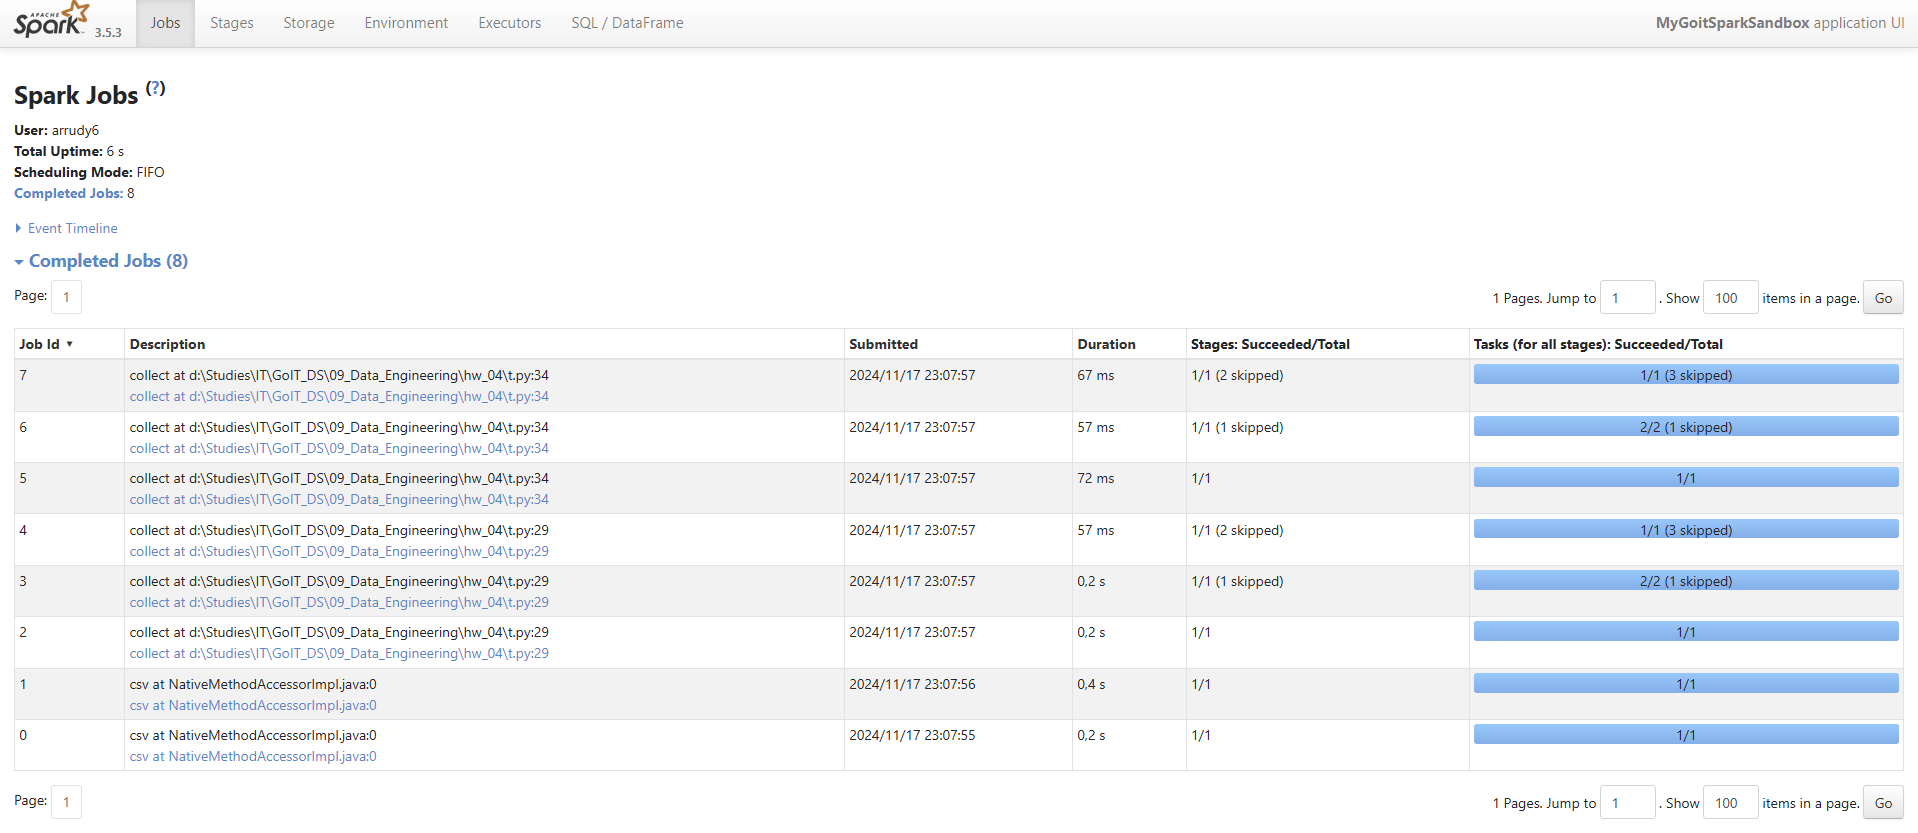

In [4]:
from pyspark.sql import SparkSession

# Створюємо сесію Spark
spark = SparkSession.builder \
    .master("local[*]") \
    .config("spark.sql.shuffle.partitions", "2") \
    .appName("MyGoitSparkSandbox") \
    .getOrCreate()

# Завантажуємо датасет
nuek_df = spark.read \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .csv('./nuek-vuh3.csv')

nuek_repart = nuek_df.repartition(2)

nuek_processed_cached = nuek_repart \
    .where("final_priority < 3") \
    .select("unit_id", "final_priority") \
    .groupBy("unit_id") \
    .count() \
    .cache()  # Додано функцію cache

# Проміжний action: collect
nuek_processed_cached.collect()

# Ось ТУТ додано рядок
nuek_processed = nuek_processed_cached.where("count>2")

nuek_processed.collect()



# Звільняємо пям'ять від Dataframe
nuek_processed_cached.unpersist()

# Закриваємо сесію Spark
spark.stop()


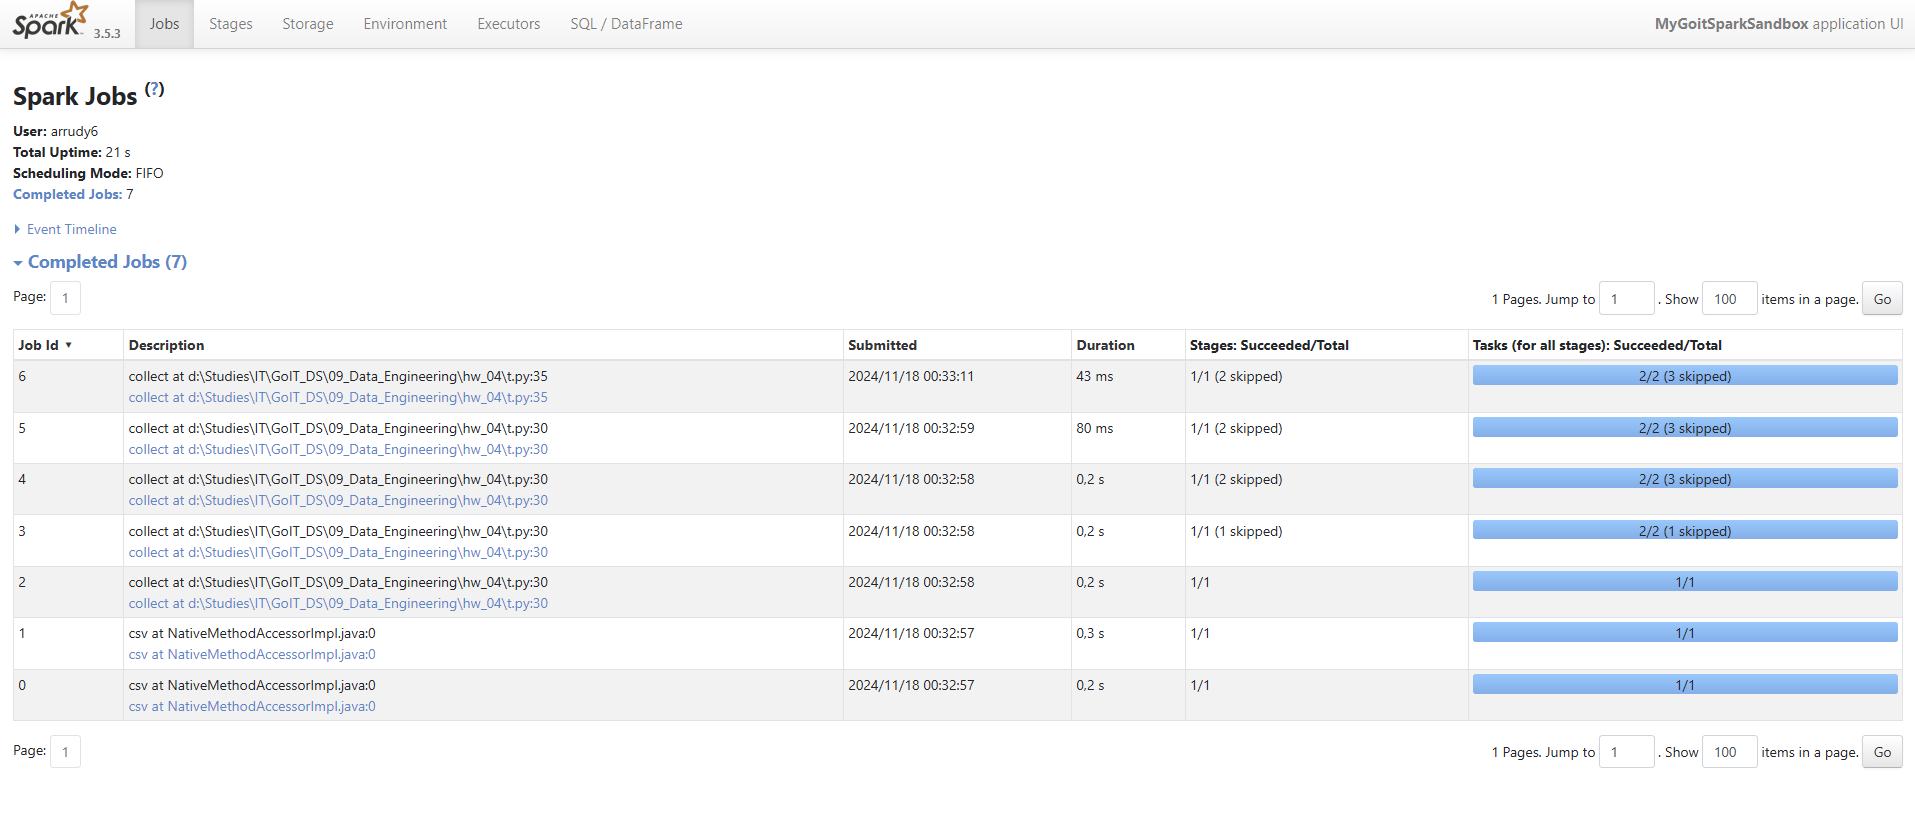
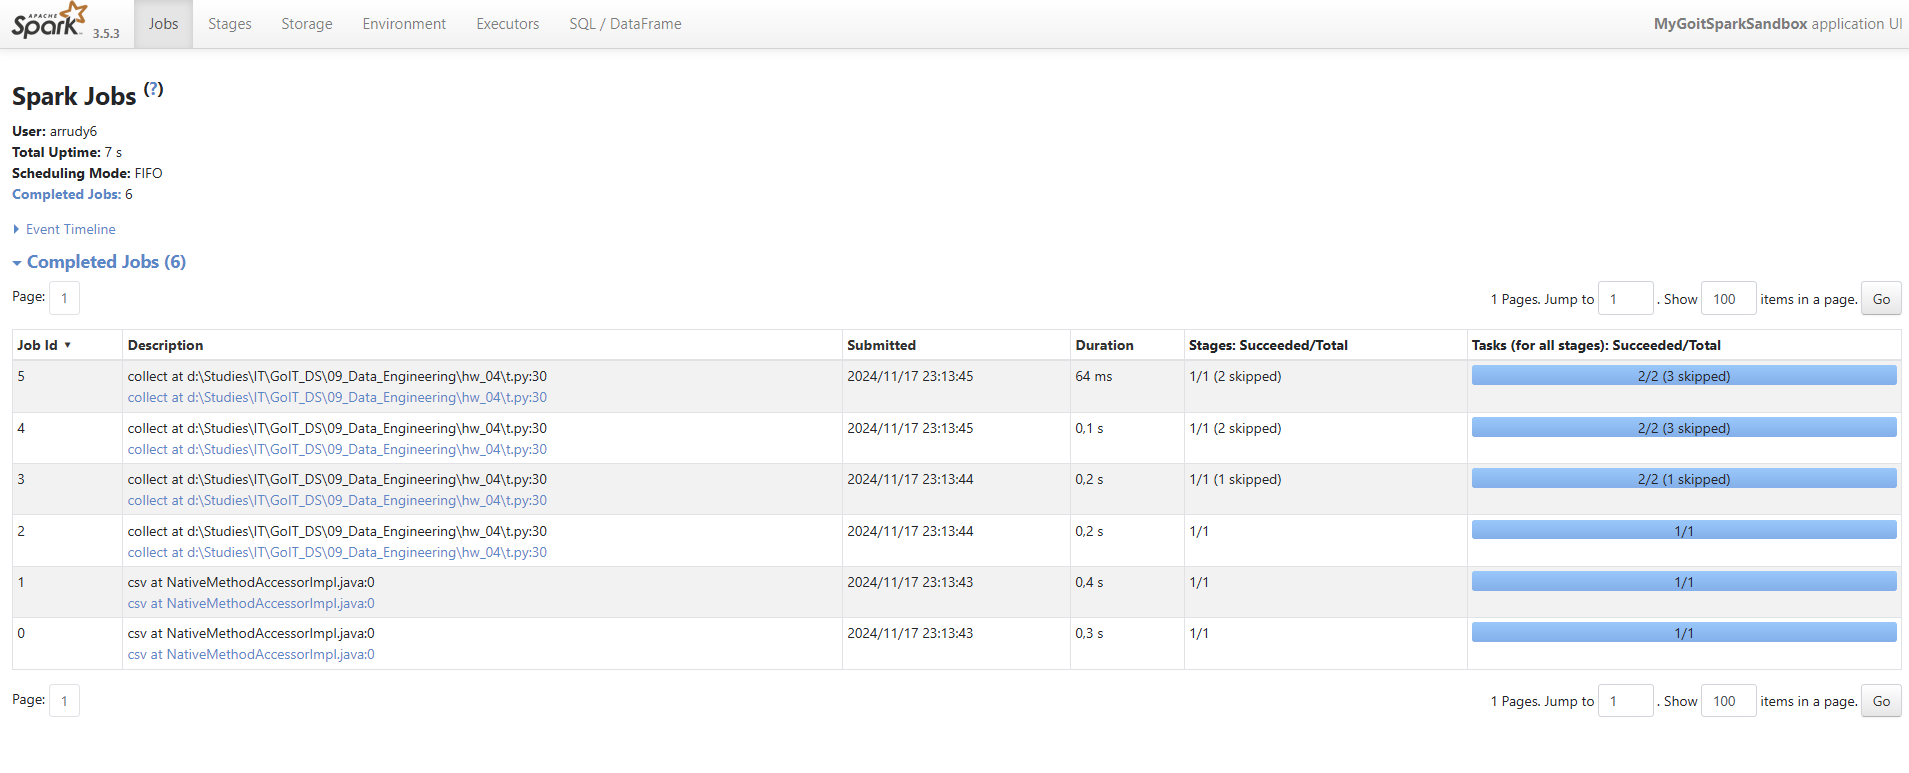